# Cycles cross product: a Jupyter Notebook
### [Vladimir V Kisil](http://www1.maths.leeds.ac.uk/~kisilv/)

This notebook provides an interactive version of the paper [Ref.11](#refKisil21).

We introduce a new invariant in [Lie sphere
  geometry](#https://en.wikipedia.org/wiki/Lie_sphere_geometry), which is analogous to the [cross-ratio](https://en.wikipedia.org/wiki/Cross-ratio) of four points in projective and hyperbolic geometries. To avoid technicalities and stay visual we will work in two dimensions, luckily all main features are already illuminating in this case. Obviously, our purpose is not to give an exhausting presentation (in fact, we are hoping it is far from being possible now), but rather to draw an attention to the new invariant and its benefits to the sphere geometry. There are numerous generalisation in higher dimensions and non-Euclidean metrics, see the last section of the paper [Ref.11](#refKisil21) for a discussion. 

**Note:** *to execute the notebook you may need to [install software](https://colab.research.google.com/github/vvkisil/Cycles-cross-ratio-Invitation/blob/master/Introduction/Software_installation_GUI_integration.ipynb).* 

Also you can use [CodeOcean capsule](https://codeocean.com/capsule/9934595/tree) or visit [HTML view of this notebook](http://www1.maths.leeds.ac.uk/~kisilv/Cycles-cross-ratio-Invitation/cycles-cross-ratio-Invitation.html).

<a id="ToC"></a>
#### Table of contents of this notebook

+ [Projective space of cycles](#ProjectiveSpace)
+ [Fractional linear transformations](#FLT)
+ [Invariant cycles product](#CycleProduct)
+ [Cycles cross ratio](#crossRatio)
  - [Definition of the cycles cross ratio and basic properties](#crossRatioDefinition)
  - [Measure of anharmonicity](#crossRatioAnharmonicity)
  - [Invariant sphere distance](#crossRatioDistance)
+ [Further reading](#furtherReading)
+ [References](#references)

[Other related notebooks](https://github.com/vvkisil/Cycles-cross-ratio-Invitation/blob/master/Table_of_contents.md).

<a id="ProjectiveSpace"></a>
## Projective space of cycles
A straightforward parametrisation of a circle equation:<a id="eq:circles-Pedoe"></a>
\begin{equation}
  x^2+y^2+2gx+2fy+c=0
  \tag{1}
  \label{eq:circles-Pedoe}
\end{equation}
by a point $(g,f,c)$ in some subset of the three-dimensional Euclidean space $\mathbb{R}^{3}$ was used in [Ref.12](#refPedoe), Ch.II. Abstractly we can treat a *point* $(x_0,y_0)$ of a plane as the zero-radius circle with coefficients $(g,f,c)=)(-x_0,-y_0,x_0^2+y_0^2)$.
It is more advantageous to use the equation<a id="eq:cycle-generic"></a>
\begin{equation}
  k(x^2+y^2) -2lx -2ny +m=0,
  \tag{2}
  \label{eq:cycle-generic}
\end{equation}
which also includes *straight lines* for $k=0$. This extension come at a price: parameters $(k,l,n,m)$ shall be treated as elements of the three dimensional projective space $P\mathbb{R}^{3}$ rather than the Euclidean space $\mathbb{R}^{4}$ since equations \eqref{eq:cycle-generic} with $(k,l,n,m)$ and $(k_1,l_1,n_1,m_1)= (\lambda k, \lambda l, \lambda n,\lambda m)$ define the same set of points for any $\lambda\neq 0$. 

Next observation is that the linear structure of $P\mathbb{R}^{3}$ is relevant for circles geometry. For example, the traditional concept of *pencil of circles* [Ref.2](#refCoxeter), §2.3 is nothing else but the linear span in $P\mathbb{R}^{3}$ [Ref.13](#refSchwerdtfeger)*{§I.1.c}. Therefore, it will be convenient to accept all points $(k,l,n,m)\in P\mathbb{R}^{3}$ on equal ground even if they correspond to an empty set of solutions $(x,y)$ in \eqref{eq:cycle-generic}. The latter can be thought as ``circles with imaginary radii''.

Following [Ref.14](#refYaglom) we call circles (with real and imaginary radii), straight lines and points on a plane by joint name [*cycles*](https://colab.research.google.com/github/vvkisil/Cycles-cross-ratio-Invitation/blob/master/Geometry_of_cycles/Start_from_Basics/What_is_cycle.ipynb). Correspondingly, the space $P\mathbb{R}^{3}$ representing them—the *cycles space*. 

An algebraic consideration often benefits from an introduction of complex number. For example, we can re-write \eqref{eq:cycle-generic} as:<a id="eq:circle-complex-matrix"></a>
\begin{align}
  \begin{pmatrix}
    -1&\bar{z}
  \end{pmatrix}
  \begin{pmatrix}
    \bar{L}&-m\\
    k&-{L}
  \end{pmatrix}
  \begin{pmatrix}
    z\\1
  \end{pmatrix}&=
                 k z\bar{z}-L\bar{z}-\bar{L}z+m
		 \tag{3}
  \label{eq:circle-complex-matrix}
		 \\
  \nonumber 
  & =   k(x^2+y^2) -2lx -2ny +m.
\end{align}
where $z=x+i y$ and $L=l+i n$.

Let us check this computation using software. First we load the package and initialise some symbols for generic calculations. Thing will go much faster once all these preparation are done (see below).

In [1]:
from figure import *
# Some symbols
k=realsymbol("k")
l=realsymbol("l")
n=realsymbol("n")
m=realsymbol("m")

x=realsymbol("x")
y=realsymbol("y")
z=x+I*y
L=l+I*n
Latex(f'FSCc expansion: ${evalm(matrix([[-1,conjugate(z)]])*matrix([[conjugate(L),-m],[k, -L]])*matrix([[z],[1]])).op(0).expand()}$')

            Python wrappers for MoibInv Library
     ---------------------------------------------
Please cite this software as
V.V. Kisil, MoebInv: C++ libraries for manipulations in non-Euclidean geometry, SoftwareX, 11(2020),100385. doi:10.1016/j.softx.2019.100385.
     ---------------------------------------------



<IPython.core.display.Latex object>

 We call  *Fillmore--Springer--Cnops construction* (or *FSCc* for short) the association of the matrix $$C= \begin{pmatrix}
    \bar{L}&-m\\
    k&-{L}
  \end{pmatrix}
$$ to a cycle with coefficients $(k,l,n,m)$[Ref.3](#refFS), [Ref.1](#refCnops).

A user MoebInv software rarely need FSCc matrix of a cycle, there are higher more convenient level tools instead. Nevertheless, the FSCc matrix can be obtained from a cycle as follows.  

In [2]:
mu=idx(symbol("mu"),1) # We will use the paravector formalism which more similar to complex numbers
e=clifford_unit(mu,diag_matrix([-1])) # Metric of the space is Euclidean

Once everything is prepared, we define a cycle and print its FSCc matrix. We define
$\LaTeX$ command `\clifford` $\newcommand{\clifford}[1][]{}$ to make the output smoother.

In [3]:
C=cycle2D(k,[l,n],m,e)
Latex(f'Cycle ${C}$ has FSCc matrix ${C.to_matrix()}$')

<IPython.core.display.Latex object>

Note that the software work in any dimensions, thus it is based on the Clifford algebras. In their terms $e^0$ shall read as the imaginary unit $i$ and $\mathbb{1}$ is just the scalar $1$. There are also some tiny difference in signs with the above definition of FSCc. 

A reader may expect a more straightforward realisation of the quadratic form \eqref{eq:cycle-generic}, cf. [Ref.13](#refSchwerdtfeger), §I.1:<a id="eq:circle-complex-Schwerdtfeger"></a>
\begin{equation}
  \begin{pmatrix}
    \bar{z} & 1
  \end{pmatrix}
  \begin{pmatrix}
    k&-{L}\\
    -\bar{L}&m
  \end{pmatrix}
  \begin{pmatrix}
    z\\1
  \end{pmatrix}=
  k z\bar{z}-L\bar{z}-\bar{L}z+m.
  \tag{4}
  \label{eq:circle-complex-Schwerdtfeger}
\end{equation}
However, FSCc will show its benefits in the next section. Meanwhile, we note that a point $z$ corresponding to the zero radius cycle with the centre $z$ is represented to the matrix<a id="eq:zero-radius-defn"></a>
\begin{equation}
  Z=
  \begin{pmatrix}
    \bar{z} & -z \bar{z}\\
    1 & -z
  \end{pmatrix}
  = \frac{1}{2}
  \begin{pmatrix}
    \bar{z} & \bar{z}\\
    1 & 1
  \end{pmatrix}
  \begin{pmatrix}
    1 & -z \\
    1 & -z
  \end{pmatrix},
  \tag{5}
  \label{eq:zero-radius-defn}
\end{equation}
where $\det Z=0$.  More generally, $$\det   \begin{pmatrix}
    \bar{L}&-m\\
    k&-{L}
  \end{pmatrix} = -k^2 r^2
$$ for $k\neq 0$ and the cycle's radius $r$. 

Zero-radius cycle can be treated as follows:

In [4]:
u=realsymbol("u")
v=realsymbol("v")
Z = cycle2D([u,v], e)
Latex(f'Cycle ${Z}$ has the determinant ${Z.to_matrix().determinant()}$')

<IPython.core.display.Latex object>

[Back to ToC](#ToC)

<a id="FLT"></a>
## Fractional linear transformations and the invariant product

In the spirit of [Erlangen programme](https://en.wikipedia.org/wiki/Erlangen_program) of Felix Klein (greatly influenced by Sophus Lie), a consideration of cycle geometry is based on a group of transformations preserving this family \cites{Kisil06a,Kisil12a}. 
Let $$M=
\begin{pmatrix}
  \alpha  &\beta\\ \gamma & \delta 
\end{pmatrix}$$ be an invertible $2\times 2$ complex matrix. Then the *fractional linear transformation* (*FLT* for short) of the extended complex plane $\dot{\mathbb{C}^{}}= \mathbb{C}^{}\cup \{\infty\}$ is defined by:<a id="eq:FLT-defn"></a>
\begin{equation}
  \begin{pmatrix}
    \alpha  &\beta\\ \gamma & \delta 
  \end{pmatrix}: z \mapsto \frac{\alpha z +\beta}{\gamma z +\delta}
  \tag{6}
  \label{eq:FLT-defn}
\end{equation}
Note that the point at infinity can be also represented by a zero-radius cycle:<a id="eq:infinity-cycle"></a>
\begin{equation}
  C_\infty =
  \begin{pmatrix}
    0& -1\\0&0
  \end{pmatrix} \qquad \text{or}\qquad
  (k,l,n,m)=(0,0,0,1).
  \tag{7}
  \label{eq:infinity-cycle}
\end{equation}
It will be convenient to introduce the notation $\bar{M}$ for the matrix $$
\begin{pmatrix}
  \bar{\alpha}  &\bar{\beta}\\ \bar{\gamma} & \bar{\delta} 
\end{pmatrix}$$ with complex conjugated entries of $M$. For a cycle $C$ the matrix $\bar{C}$ corresponds to the reflection of $C$ in the real axis $y=0$.  Also due to special structure of FSCc matrix we easily check that<a id="eq:conjugated-inverse"></a>
\begin{equation}
  \bar{C}C={C}\bar{C}=-\det(C)I
  \qquad \text{or} \qquad
  \bar{C} \sim C^{-1} \text{ projectively if } \det(C)\neq 0.
  \tag{8}
  \label{eq:conjugated-inverse}
\end{equation}

**Lemma**.  *The transformation \eqref{eq:FLT-defn} maps a cycle* $$C=  \begin{pmatrix}
    \bar{L}&-m\\
    k&-{L}
  \end{pmatrix}
$$ *into a cycle* $$C_1=  \begin{pmatrix}
    \bar{L}_1&-m_1\\
    k_1&-{L}_1
  \end{pmatrix}
  $$ *such that* $C_1= \bar{M} C M^{-1}$.

For the matrix form \eqref{eq:circle-complex-Schwerdtfeger} the above matrix similarity needs to be replaced by the matrix congruence  $C_1= M^* C M$ [Ref.13](#refSchwerdtfeger), §II.6.e. 

[Back to ToC](#ToC)

<a id="CycleProduct"></a>
## Invariant cycle product
This difference is significant in view of the following definition.

**Definition 1**.
    *For two cycles $C$ and $C_1$ define the *cycles product* by:*<a id="eq:cycles-product-defn"></a>
  \begin{equation}
    〈C, C_1〉=-\mathbf{tr}(C\bar{C}_1),
    \tag{9}
    \label{eq:cycles-product-defn}
  \end{equation}
  *where $\mathbf{tr}$ denotes the trace of a matrix*.
  
  *We call two cycles $C$ and $C_1$ *orthogonal* if $〈C, C_1〉=0$*.

It is easy to find the explicit expression of the cycle product \eqref{eq:cycles-product-defn}:
Let us define the second cycle:

In [5]:
k1=realsymbol("k1", "{k'}")
l1=realsymbol("l1", "{l'}")
n1=realsymbol("n1", "{n'}")
m1=realsymbol("m1", "{m'}")

C1=cycle2D(k1,[l1,n1],m1,e)
Latex(f'Cycle product if two cycles is: ${C.cycle_product(C1)}$')

<IPython.core.display.Latex object>

That is for the complex plane with $\sigma =-1$ we have<a id="eq:cycle-product-explicit"></a>
\begin{equation}
  〈C, C_1〉 = km_1+k_1m-2ll_1-2nn_1,
  \tag{10}
  \label{eq:cycle-product-explicit}
\end{equation}
and observe that it is linear in coefficients of the cycle $C$ (and $C_1$ as well).
On the other hand, it is the initial definition \eqref{eq:cycles-product-defn}, which allows us to use the invariance of trace under matrix similarity to conclude:
**Corolloray**
  *The cycles product is invariant under the transformation $C\mapsto    \bar{M} C M^{-1}$. Therefore FLT \eqref{eq:FLT-defn} preserves orthogonality of cycles.*

The cycle product is a rather recent addition to the cycle geometry, see independent works [Ref.3](#refFS) [Ref.1](#refCnops). Interestingly, the expression \eqref{eq:cycles-product-defn} essentially repeats the [GNS-construction](https://en.wikipedia.org/wiki/Gelfand-Naimark-Segal_construction) in $C^*$-algebras which is older by a half of century at least.

<a id="aboutOrthogonality"></a>
The cycles product and cycles orthogonality encode a great amount of geometrical characteristics, e.g.:

+   A cycle is a straight line if it is orthogonal
    $〈C, C_\infty〉=0$ to the zero-radius cycle at
    infinity $C_\infty$ \eqref{eq:infinity-cycle}.


In [6]:
Zinf=cycle2D(0,[0,0],1,e)
Latex(f'Infinity cycle: ${Zinf}$. Product with it is: ${C.is_orthogonal(Zinf)}$')

<IPython.core.display.Latex object>

+ <a id="eq:it:point-zero-radius"></a>
  A cycle $Z$ represents a point if $Z$ is
  self-orthogonal (*isotropic*):
  $〈Z, Z〉=0$. More generally, \eqref{eq:conjugated-inverse} implies:
 \begin{equation}
  \label{eq:cycles-self-product-is-det}
  〈C, C〉=2\det(C).
 \end{equation}

In [7]:
Latex(f'Point is self-orthogonal: {bool(Z.is_orthogonal(Z))}. '
      +(f'Self-product is tvice determinant: {(C.cycle_product(C)-2*remove_dirac_ONE(C.to_matrix().determinant())).is_zero()}'))


<IPython.core.display.Latex object>

+ A cycle $C$ passes a point $Z$ if they are orthogonal $〈C, Z〉=0$.

In [8]:
Latex(f'Equation for othogonality ${C.is_orthogonal(Z)}$ is the same as for passing: ${C.passing([u,v])}$')

<IPython.core.display.Latex object>

+ A cycles represents a line in Lobachevsky   geometry if it is orthogonal
  $〈C, C_{\mathbb{R}}〉=0$  to the real line cycle
  $$C_{\mathbb{R}^{}}=
  \begin{pmatrix}
    i &0\\0& i
  \end{pmatrix}
  $$.

In [9]:
CR = cycle2D(0,[0,1],0,e)
Latex(f'Orthogonality to the real line: ${C.is_orthogonal(CR)}$')

<IPython.core.display.Latex object>

+ Two cycles are orthogonal as subsets of a plane (i.e. they have perpendicular tangents at an intersection point)  if they are   orthogonal in the sense of cycle product Definition.
  
  Indeed, let us:
  * Build a generic cycle `C2` orthogonal to `C`.
  * Find centres of both cycles and distance $d$ between them. 
  * Check the Pythagoras rule $d^2=r^2 + r_2^2$.

In [10]:
C2=C1.subject_to([C1.is_orthogonal(C)])
P=C.center()
P2=C2.center()
f'Both orthogonalities are the same: {((P[0]-P2[0])**2+(P[1]-P2[1])**2-C.radius_sq()-C2.radius_sq()).expand().normal().is_zero()}'


'Both orthogonalities are the same: True'

+ Two cycles $C$ and $C_1$
  are *tangent* if
   $$ 〈C, C_1〉^2
    =  〈C, C〉
    〈C_1, C_1〉
    $$
    
    Indeed, let us:
    * Pick a point $(u,v$ and find the distance to $d$ to the centre of `C`
    * Define a cycle `C3` with centre $(u,v)$ and the radius $r_3=d-r$.
    * Check the formula for `C` and ``C3`.

In [11]:
d = sqrt((P[0]-u)**2+(P[1]-v)**2)
r3_sq=((d-sqrt(C.radius_sq()))**2).expand()
C3=cycle2D([u,v],e, r3_sq)
f'Tangency condition is correct: {(C.cycle_product(C3)**2- C.cycle_product(C)*C3.cycle_product(C3)).expand().normal().is_zero()}'

'Tangency condition is correct: True'

+  The *inversive distance* [Ref.2](#refCoxeter), §5.8 $\theta$ of two (non-isotropic) cycles is defined by the formula:
  \begin{equation}
    \theta     =  \frac{〈C, C_1〉}{\sqrt{
    〈C, C〉 〈C_1, C_1〉}}.
    \tag{11}
    \label{eq:inversive-distance}
  \end{equation}
  In particular, the above discussed orthogonality corresponds to
  $\theta=0$ and the tangency to $\theta=\pm1$. For intersecting
  cycles $\theta$ is the cosine of the intersecting
  angle. Out of curiosity we may want to find its cumbersome explicit formula

In [12]:
Latex(f'Inversive distance is: $\displaystyle {(C.cycle_product(C1)/sqrt(C.cycle_product(C) * C1.cycle_product(C1))).normal()}$')

<IPython.core.display.Latex object>

+ A generalisation of Steiner power $d$ of two cycles is defined
  as, cf. [Ref.3](#refFS), §1.1:
  $$   
  d=    〈C, C_1〉    + \sqrt{〈C, C〉  〈C_1, C_1〉}, 
  \tag{12}
  \label{eq:steiner-power}
  $$
  where both cycles $C$ and $C_1$ are scaled to have $k=1$ and $k_1=1$. Geometrically, the
  generalised Steiner power for spheres provides the square of
  tangential distance.

In [13]:
Cn=cycle2D(1, [l, n], m, e) # k-normalised cycles 
C1n=cycle2D(1, [l1, n1], m1, e)
Latex(f'Steiner powe is: $\displaystyle {(Cn.cycle_product(C1n) +sqrt(Cn.cycle_product(Cn) * C1n.cycle_product(C1n))).normal()}$')

<IPython.core.display.Latex object>

The cycles product is *indefinite*, see [Ref.4](#refGohberg) for an  account of the theory with some refreshing differences to the more familiar situation of inner product spaces. One illustration is the presence of self-orthogonal non-zero vectors, see zero-radius cycles above. Another noteworthy observation is that the product \eqref{eq:cycle-product-explicit} has the Lorentzian signature $(1,3)$ and $\mathbb{R}^{4}$ with this product is isomorphic to Minkowski space-time. 

[Back to ToC](#ToC)

<a id="crossRatio"></a>
## Cycles cross ratio
Due to the projective nature of the cycles space (i.e. matrices $C$ and $\lambda C$ correspond to the same cycle) a *non-zero* value of the cycle product [()](#eq:cycles-product-defn) is not directly meaningful. Of course, this does not affect the cycles orthogonality. A partial remedy in other cases is possible through various *normalisations* [Ref.6](#refKisil12), § 5.2. Usually they are specified by conditions either  
+ $k=1$, which is convenient for metric properties of cycles. It brings us back to the initial equation \eqref{eq:circles-Pedoe} and is not possible for straight lines; or
+ $〈C, C〉=\pm 1$, which is useful, say, for tangency but is not possible for points. 

<a id="crossRatioDefinition"></a>
### Definition of the cycles cross ratio and basic properties 
Recall, that the projective ambiguity is elegantly balanced in the *cross ratio* of four points:
$$
  (z_1,z_2;z_3,z_4) = \frac{z_1-z_3}{z_1-z_4} :  \frac{z_2-z_3}{z_2-z_4}.
\tag{13}
\label{eq:cross-ratio-points}
$$
We use this classical pattern in the following definition.

**Definition 2**.  A *cycles cross ratio*  of four cycles $C_1$, $C_2$, $C_3$ and  $C_4$ is:
$$
\tag{14}
\label{eq:cycles-cross-ratio-defn}
    〈C_1, C_2; C_3, C_4〉= \frac{〈C_1, C_3〉}{〈C_1, C_4〉}:\frac{〈C_2, C_3〉}{〈C_2, C_4〉}.
$$

As an initial justification of the definition we list the following properties.

**Proposition 1**.
+ The cycles cross ratio is a well-defined FLT-invariant of quadruples of cycles.
+ The cycles cross ratio of four zero-radius cycles is the square of the cross ratio for the respective points:
$$
   \tag{15}
    \label{eq:cross-ratio-points-eq}
      〈Z_1, Z_2; Z_3, Z_4〉=  (z_1,z_2;z_3,z_4)^2.
$$
+ There is the *cancellation formula*:
$$
    \tag{16}
    \label{eq:cross-ratio-cancellation}
          〈C_1, C; C_3, C_4〉    〈C, C_2; C_3, C_4〉    = 〈C_1, C_2; C_3, C_4〉
$$

To demonstrate that there is more than just a formal similarity between two we briefly list some applications. First, we rephrase Ex. [](#it:inversive-distance) in new terms.

<a id="ex:inversive-dist-cross-ratio"></a>
**Example 1**.
The inversive distance [(11)](#eq:inversive-distance) between two cycles relates to the cycles cross product:
$$
      \theta^2 = 〈C,C_1;C_1,C〉.
$$
    In particular cycles are
  
+ orthogonal if $〈C,C_1;C_1,C〉=0$;
+ tangent if $〈C,C_1;C_1,C〉=\pm 1$; and
+ disjoint if  $|〈C,C_1;C_1,C〉|> 1$.
  
Thereafter, FLT-invariance of the cycles cross ratio implies that the intersection angle of cycles is FLT-invariant. 

**Example 2**.
  The Steiner power (\ref{eq:steiner-power}) can be written as:
$$
    d(C,C_1)=  〈C,C_{\mathbb{R}^{}};C_1,C_{\mathbb{R}^{}}〉 +
    \sqrt{〈C,C_{\mathbb{R}^{}};C,C_{\mathbb{R}^{}}〉} \cdot
    \sqrt{〈C_1,C_{\mathbb{R}^{}};C_1,C_{\mathbb{R}^{}}〉} ,
$$
  where $C_{\mathbb{R}^{}}$ is the real line and cycles $C$ and $C_1$ do not need to be normalised in any particular way. Thereafter, the Steiner power is an invariant of two cycles $C$ and $C_1$  under Möbius transformations,  since they fix the real line $C_{\mathbb{R}^{}}$. The Möbius invariance is not so obvious from the expression (\ref{eq:steiner-power}).
  
[Back to ToC](#ToC)

<a id="crossRatioAnharmonicity"></a>
### Measure of anharmonicity

The next two applications will generalise the main features of the traditional cross ratio. Recall the other name of the cross ratio–-the anharmonic ratio. The origin of the latter is as follows. Two points $z_1$ and $z_2$ on a line define one-dimensional sphere with the centre $O=\frac{1}{2}(z_1+z_2)$, which can be tacken as the origin. Two points $c_1$ and $c_2$ are called *harmonically conjugated* (with respect to $z_1$ and $z_2$) if:  
$$
c_1\cdot c_2 = - z_1\cdot z_2, 
$$

It is easy to check that in this case

$$
(c_1,c_2;z_1,z_2)=-1.
\tag{17}
\label{eq:harmonic-points-cross-ratio}
$$

Thus, the cross ratio can be viewed as a measure how far four points are from harmonic conjugation, i.e. a measure of anharmonicity of a quadruple.



To make a similar interpretation of the cycles cross ratio recall that for FSCc matrices of a cycle $C_1$ and its *reflection* $C_2$ in a cycle $C$ we have: $C_2=C\bar{C}_1C$ [Ref.6](#refKisil12a), § 6.5. That is, the reflection in a cycle $C$ is the composition  of FLT transform with FSCc matrix $C$ and complex conjugation of matrix entries. It is easily to obtain:

**Proposition 2**.
<a id="pr:inversive-distance-orthogonal"></a>
\label{pr:inversive-distance-orthogonal}
If a cycle $C_1$ is a reflection of $C_2$ in a cycle $C$ then:
$$
〈C_1, C; C, C_1〉 =   〈C_2, C; C, C_2〉.
$$
More generally, the reflection in a cycle preserves the inversive distance, cf. [Ex.1](#ex:inversive-dist-cross-ratio). 

The above condition is necessary, we describe a sufficient one as a [*figure*](https://colab.research.google.com/github/vvkisil/Cycles-cross-ratio-Invitation/blob/master/Geometry_of_cycles/Start_from_Basics/What_is_figure.ipynb) in the sense of {[Ref.8](#refKisil18) [Ref.9](#refKisil19) [Ref.10](#refKisil20)}. In short, a figure is an ensemble of cycles interrelated by cycles' relations. For purpose of this paper FLT-invariant relation ``to be orthogonal'' between two cycles is enough. 

**Figure 1**.
+ For given two cycles $C$ and $C_1$ construct the reflection $C_2=C\bar{C}_1C$ of $C_1$ in $C$.

In [14]:
f = figure()
C = f.add_cycle(cycle_data(k, [l, n], m), "C")
C1 = f.add_cycle(cycle_data(k1, [l1, n1], m1), "C1")
C2 = f.add_cycle_rel([conjugation([C1,C])], "C2")

+ Take any cycle $C_o$ orthogonal to   $C$ and $C_1$, see Ill. [](#fig:reflected-cycles). All such cycles make a *pencil*–-one dimensional subspace of the projective space of cycles. That is because there are only two linear equations for orthogonality \eqref{eq:cycle-product-explicit} to determine four projective coordinates $(k_o,l_o,n_o,m_o)$. By Prop. [](#pr:inversive-distance-orthogonal) $C_o$ is also orthogonal to $C_2$.

In [15]:
Co = f.add_cycle_rel([is_orthogonal(C), is_orthogonal(C1)], "Co", "C_o")

+ Define cycles by orthogonality to $C$, $C_o$ and itself (zero-radius condition), that is the intersection points of  $C$ and $C_o$. Since self-orthogonality is a quadratic condition there are two solutions: $Z_1$ and $Z_2$.

In [16]:
Z = f.add_cycle_rel([is_orthogonal(C), is_orthogonal(Co), is_orthogonal()], "Z")
Z1 = f.add_cycle_rel([with_index(Z,0)], "Z1")
Z2 = f.add_cycle_rel([with_index(Z,1)], "Z2")

+ The harmonic conjugation of $C_1$ and $C_2$ (their reflection in $C$) implies, cf. \eqref{eq:harmonic-points-cross-ratio}:
$$
\tag{18}
\label{eq:harmonic-cycless-cross-ratio}
〈C_1,C_2;Z_1,Z_2〉=1.
$$

In [17]:
Res = f.measure(C1, [C2, Z1, Z2], "z")
for M in Res:
    print(f'Cycles cross ratio value: {M.normal()}')

Cycles cross ratio value: 1


Thus our symbolic computation show the desired result. 

We also make an illustration for the paper. First we are adding a bit of colour.

In [18]:
f.set_asy_style(C,"rgb(0,0,.9)")
f.set_asy_style(C1,"rgb(0.9,0,0)")
f.set_asy_style(C2,"rgb(0,0,.9)")
f.set_asy_style(Co,"dashed")
f.set_asy_style(Z,"invisible")

Then we substitute some definite values to all parameters, do not forget about an additional free parameter in the cycle `Co`.

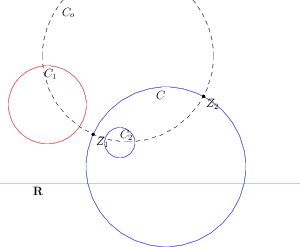

In [19]:
Coc = f.get_cycles(Co)[0]
n0 = Coc.get_l(1)
f.subs([k==1, l==-.15, n==.425, m==-3.8, k1==1, l1==-3.12, n1==1.98, m1==12.7, n0==3.2*Coc.get_k()], 0x0100)\
 .asy_write(300,-4.3,3.2,-3,4.6,"cycle-anharmonicity","png")
Image("cycle-anharmonicity.png")

[Back to ToC](#ToC)

<a id="crossRatioDistance"></a>
### Invariant sphere distance

As the final illustration, we introduce Möbius-invariant distance between cycles. Recall that FLT with a $\mathrm{SL}_2(\mathbb{R})$ matrix fixes the real line and it is called a *Möbius transformation* [Ref.5](#refKisil07) [Ref.6](#refKisil12), Ch. 1. The corresponding figure is as follows, see Ill. [](#fig:constr-mobi-invar):

<a id="fig:distance"></a>
**Figure 2**.
+ Let two distinct cycles $C_1$ and $C_2$  be given and they are different from the real line $C_{\mathbb{R}^{}}$.


In [20]:
f = figure()
C1 = f.add_cycle(cycle_data(k1, [l1, n1], m1), "C1")
C2 = f.add_cycle(cycle_data(k, [l, n], m), "C2")

+ Define a cycle $C$ to be orthogonal to $C_1$, $C_2$, and $C_{\mathbb{R}^{}}$. It is specified by three linear equation for homogeneous coordinates $(k, l, n, m)$. In generic position a solution is unique, however it can be an imaginary cycle (with a negative square of the radius). 

In [21]:
C = f.add_cycle_rel([is_orthogonal(C1), is_orthogonal(C2),  is_orthogonal(f.get_real_line())], "C", "C")

+ Define cycles by orthogonality to $C$, $C_{\mathbb{R}^{}}$ and itself, that is the intersection points of $C$ and $C_{\mathbb{R}^{}}$. In general position there are two solutions which we denote by $Z_1$ and $Z_2$. For an imaginary cycle $C$ first coordinates of $Z_1$ and $Z_2$ are conjugated complex numbers.

In [22]:
Z = f.add_cycle_rel([is_orthogonal(C), is_orthogonal(f.get_real_line()), is_orthogonal()], "Z")
Z1 = f.add_cycle_rel([with_index(Z,0)], "Z1")
Z2 = f.add_cycle_rel([with_index(Z,1)], "Z2")

+ Since the entire construction is completely determined by the given cycles  $C_1$ and $C_2$ we define the *distance between two cycles* by:
$$
\tag{19}
\label{eq:distance-cross-ratio}
d(C_1,C_2)= \textstyle \frac{1}{2}\log 〈C_1,C_2; Z_1,Z_2〉.
$$


From Möbius invariance of the real line and cycles cross ratio our construction implies the following:

<a id="pr:inv-distance"></a>
**Proposition 3**.
1. The distance \eqref{eq:distance-cross-ratio} is Möbius invariant;
2. <a id="item:distance-equality"></a> For zero-radius cycles $C_1$, $C_2$ formula \eqref{eq:distance-cross-ratio} coincides with the Lobachevsky metric on the upper-half plane. 
3. <a id="item:vertical-geodesic"></a> If centres of $C_1$ and $C_2$ are on the imaginary axis (therefore $Z_1$ and $Z_2$ are zero and infinity) then $  d(C_1,C_2)=\log(m_1/k_1)-\log(k_2/m_2)$.
4. <a id="item:additivity"></a> In terms of the previous construction, for any cycle $C_3$ orthogonal to $C$ the (signed) distance is additive: $d(C_1,C_3)=d(C_1,C_2)+d(C_2,C_3)$.

Obviously, [Prop.3.2](#item:distance-equality) is the consequence of~\eqref{eq:cross-ratio-points-eq}. The expression in [Prop.3.3](#item:vertical-geodesic) can be obtained by a direct computation:

In [23]:
f.move_cycle(C1, cycle_data(k1, [0, n1], m1))
f.move_cycle(C2, cycle_data(k, [0, n], m))
Res = f.subs([l==0, l1==0]).measure(C1, [C2, Z1, f.get_infinity()], "z")
for M in Res:
    display(Latex(f'Cycles distance: ${M.normal()}$'))

<IPython.core.display.Latex object>

Finally, [Prop.3.4](#item:additivity) follows from the cancellation rule \eqref{eq:cross-ratio-cancellation}. 

Making the paper illustration:

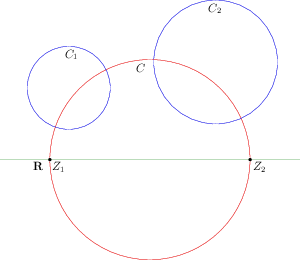

In [24]:
f.set_asy_style(C,"rgb(.9,0,0)")
f.set_asy_style(C1,"rgb(0,0,.9)")
f.set_asy_style(C2,"rgb(0,0,.9)")
f.set_asy_style(Z,"invisible")

f.move_cycle(C1, cycle_data(1, [-3.53, 1.75], 14.5))
f.move_cycle(C2, cycle_data(1, [.05, 2.38], 3.39))
f.asy_write(300,-5.2,2.1,-3,4.1,"cycle-distance","png")
Image("cycle-distance.png")

Comparing constructions in the previous two images and formulae \eqref{eq:harmonic-cycless-cross-ratio}–\eqref{eq:distance-cross-ratio} we can say that the invariant distance measures how two cycles are far from being a  reflection of each other in the real line.

[Back to ToC](#ToC)

<a id="references"></a>
### References

  <a id="refCnops"></a>
1. J. Cnops, *Hurwitz pairs and applications of Möbius transformations*. Habilitation Dissertation, Universiteit Gent, 1994. 

  <a id="refCoxeter"></a>
2.  H. S. M. Coxeter and S. L. Greitzer. *Geometry revisited*. Random House, New York, 1967.
Zbl0166.16402.

  <a id="refFS"></a>
3.  J. P. Fillmore and A. Springer. *Möbius groups over general fields using Clifford algebras associated with spheres*. Internat. J. Theoret. Phys., **29** (3):225–246, 1990.

  <a id="refGohberg"></a>
4.  I. Gohberg, P. Lancaster, and L. Rodman. *Indefinite linear algebra and applications*. Birkhäuser Verlag, Basel, 2005.

   <a id="refKisil07"></a>
5. V.V. Kisil. *Starting with the group SL2(R).* Notices Amer. Math. Soc., [**54**(11):1458–1465](http://www.ams.org/notices/200711/tx071101458p.pdf), 2007. [arXiv:math/0607387](https://arxiv.org/abs/math/0607387), Zbl # 1137.22006.

  <a id="refKisil12"></a>
6. Vladimir V. Kisil. *Geometry of Möbius Transformations: Elliptic, Parabolic and Hyperbolic Actions of $SL_2(\mathbb{R})$*. [Imperial College Press](https://www.worldscientific.com/worldscibooks/10.1142/p835), London, 2012. Includes a live DVD.

  <a id="refKisilMN"></a>
7.  Vladimir V. Kisil, [*MoebInv notebooks*](https://github.com/vvkisil/Cycles-cross-ratio-Invitation), 2019.

   <a id="refKisil18"></a>
8. V. V. Kisil. An extension of Mobius–Lie geometry with conformal ensembles of cycles and its implementation in a GiNaC library. Proc. Int. Geom. Cent., 11 (3):45–67, 2018. E-print: [arXiv:1512.02960](https://arxiv.org/abs/1512.02960). Project page: http://moebinv.sourceforge.net/.

   <a id="refKisil19"></a>
9. V. V. Kisil. Möbius–Lie geometry and its extension. In I. M. Mladenov, G. Meng, and A. Yoshioka (eds.) Geometry, integrability and quantization XX, pages 13–61, Bulgar. Acad. Sci., Sofia, 2019. E-print: [arXiv:1811.10499](https://arxiv.org/abs/1811.10499).

  <a id="refKisil20"></a>
10.  V. V. Kisil. *MoebInv: C++ libraries for manipulations in non-Euclidean geometry*. SoftwareX, **11**:100385, 2020. doi: [10.1016/j.softx.2019.100385](http://dx.doi.org/10.1016/j.softx.2019.100385).

  <a id="refKisil21"></a>
11. V. V. Kisil. *Cycles cross ratio: an Invitation*, 2021, [arXiv:2105.05634](https://arxiv.org/abs/2105.05634).

  <a id="refPedoe"></a>
12. D. Pedoe. *Circles: A mathematical view*. MAA Spectrum. Mathematical Association of America, Washington, DC, 1995. Revised reprint of the 1979 edition, With a biographical appendix on Karl Feuerbach by Laura Guggenbuhl.

  <a id="refSchwerdtfeger"></a>
13. H. Schwerdtfeger. *Geometry of complex numbers: Circle geometry, Möbius transformation, non-Euclidean geometry*. Dover Books on Advanced Mathematics. Dover Publications Inc., New York, 1979. A corrected reprinting of the 1962 edition.

  <a id="refYaglom"></a>
14. I. M. Yaglom. *A Simple Non-Euclidean Geometry and Its Physical Basis.* Heidelberg Science Library. Springer-Verlag, New York, 1979. Translated from the Russian by Abe Shenitzer, with the editorial assistance of Basil Gordon.

[Back to ToC](#ToC)

Back to the [top-level Table of Contents](https://github.com/vvkisil/MoebInv-notebooks/blob/master/Table_of_contents.md).